In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def preprocess_mnist(x, y):
    """
    Resize MNIST images, convert to RGB,
    apply ResNet50 preprocessing, and one-hot encode labels
    """
    # Add channel dimension & resize
    x = tf.image.resize(tf.expand_dims(x, axis=-1), (32, 32))

    # Convert grayscale to RGB
    x = tf.repeat(x, 3, axis=-1)

    # Convert to float & apply ResNet preprocessing
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.resnet50.preprocess_input(x)

    # One-hot encode labels
    y = to_categorical(y, 10)

    return x, y

In [4]:
x_train_pp, y_train_pp = preprocess_mnist(x_train, y_train)
x_test_pp, y_test_pp = preprocess_mnist(x_test, y_test)

In [5]:
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3)
)

# Freeze pretrained layers
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
history = model.fit(
    x_train_pp,
    y_train_pp,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.6963 - loss: 1.0345 - val_accuracy: 0.9189 - val_loss: 0.2505
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8891 - loss: 0.3483 - val_accuracy: 0.9303 - val_loss: 0.2150
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9076 - loss: 0.2826 - val_accuracy: 0.9441 - val_loss: 0.1774
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9185 - loss: 0.2521 - val_accuracy: 0.9441 - val_loss: 0.1724
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9238 - loss: 0.2354 - val_accuracy: 0.9445 - val_loss: 0.1758
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9257 - loss: 0.2254 - val_accuracy: 0.9503 - val_loss: 0.1613
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9310 - loss: 0.2149 - val_accuracy: 0.9526 - val_loss: 0.1532
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9324 - loss: 0.2035 - val_acc

In [9]:
test_loss, test_acc = model.evaluate(x_test_pp, y_test_pp, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9525


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


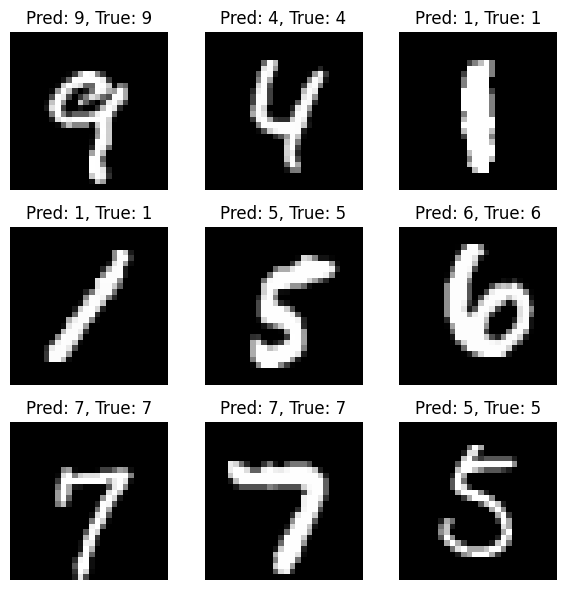

In [10]:
num_images = 9
indices = np.random.choice(len(x_test), num_images, replace=False)

plt.figure(figsize=(6,6))
for i, idx in enumerate(indices):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx], cmap="gray")

    sample, _ = preprocess_mnist(
        x_test[idx:idx+1],
        y_test[idx:idx+1]
    )

    pred = np.argmax(model.predict(sample), axis=1)[0]
    plt.title(f"Pred: {pred}, True: {y_test[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()